In [1]:
import pandas as pd
import numpy as np
import graph_tool.all as gt

### Cliques with max closeness centrality in network

In [2]:
import clique_closeness_centrality_max as MCBB

In [3]:
#read graph
G = gt.collection.ns['interactome_yeast']  
G.set_directed(False)
gt.remove_self_loops(G)
G = gt.GraphView(G, vfilt=gt.label_largest_component(G))
G.num_vertices(), G.num_edges()

(1458, 1948)

In [66]:
#generate node layout
pos = gt.sfdp_layout(G)

In [46]:
#Find a clique with max-distance closeness centrality
dist_mtx = gt.shortest_distance(G)   #pairwise distance matrix
D_star, OptSol = MCBB.Binary_search_tree(G, dist_mtx)

In [47]:
#optimal solution
D_star, OptSol

({685, 991}, 10)

In [56]:
#color a clique
vc = G.new_vp('string')
vs = G.new_vp('int')
for v in G.iter_vertices(): 
    vc[v] = '#34af9f' if v in D_star else '#b2b2b2'
    vs[v] = 10 if v in D_star else 2
ec = G.new_ep('string')
es = G.new_ep('float')
for e in G.edges(): 
    ec[e] = '#34af9f' if len({list(e)[0], list(e)[1]} - set(D_star)) == 0 else '#b2b2b2'
    es[e] = 2 if len({list(e)[0], list(e)[1]} - set(D_star)) == 0 else .4 

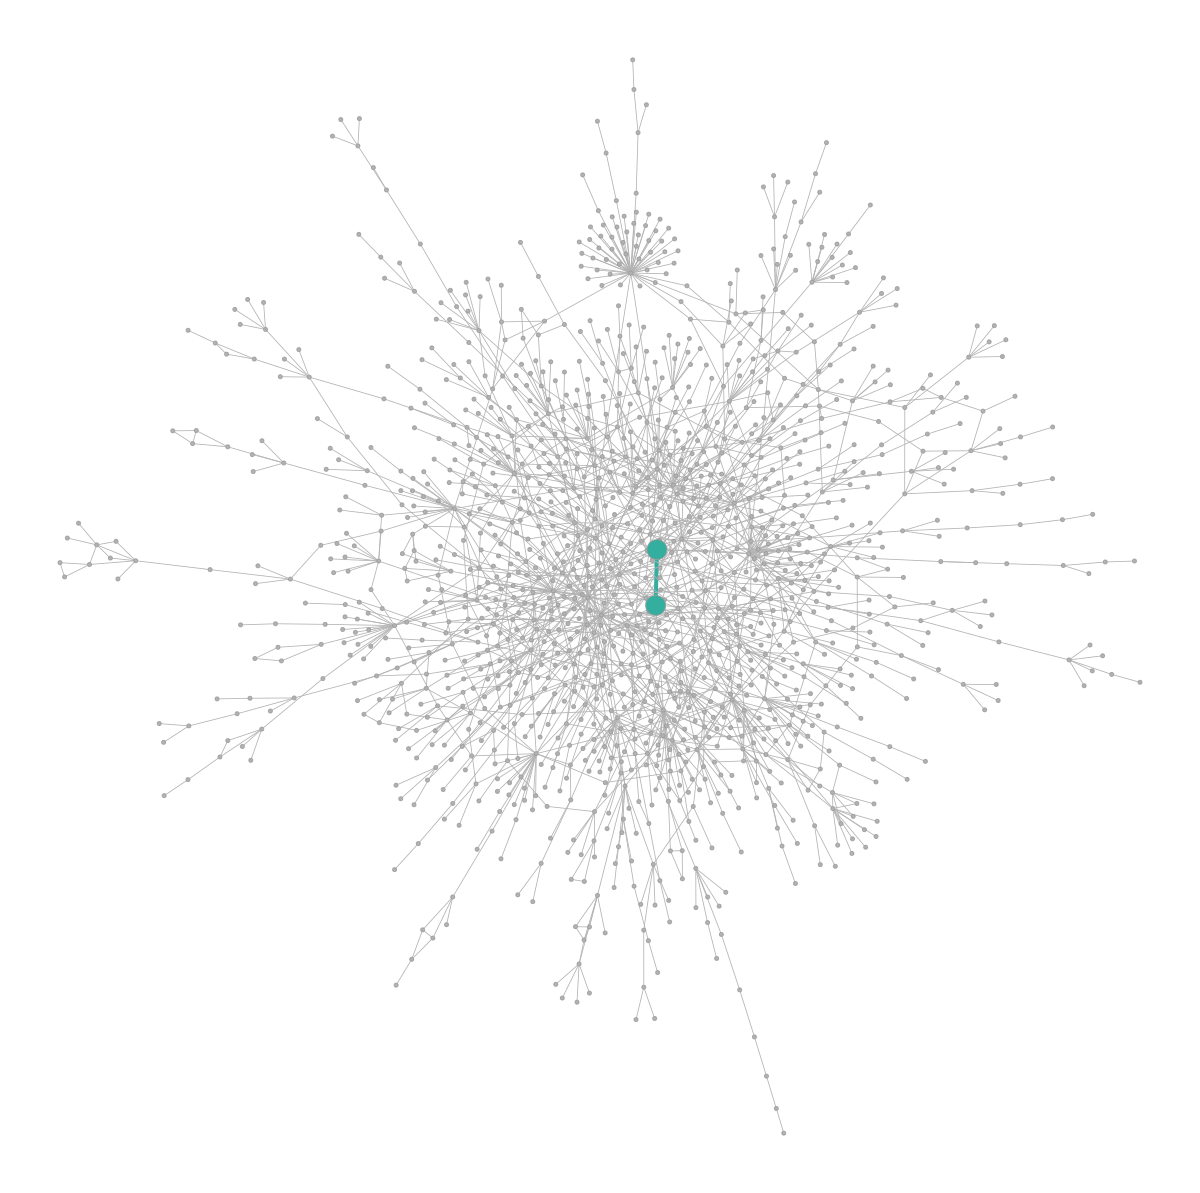

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7feefa590880, at 0x7feef93547c0>

In [59]:
gt.graph_draw(G, pos=pos, vertex_font_size=6, vertex_pen_width=.5, vertex_fill_color=vc, vertex_size=vs,
              edge_pen_width=es, edge_color=ec)#,
             #output='max_distance_closeness_central_clique.svg')

### Cliques with total closeness centrality in network

In [6]:
import clique_closeness_centrality_total as TCBB

In [7]:
D_star, OptSol = TCBB.Binary_search_tree(G, dist_mtx)

In [8]:
D_star, OptSol

([25, 968, 77], 5733)

In [61]:
#color a clique
vc = G.new_vp('string')
vs = G.new_vp('int')
for v in G.iter_vertices(): 
    vc[v] = '#34af9f' if v in D_star else '#b2b2b2'
    vs[v] = 10 if v in D_star else 2    
ec = G.new_ep('string')
es = G.new_ep('float')
for e in G.edges(): 
    ec[e] = '#34af9f' if len({list(e)[0], list(e)[1]} - set(D_star)) == 0 else '#b2b2b2'
    es[e] = 2 if len({list(e)[0], list(e)[1]} - set(D_star)) == 0 else .4 

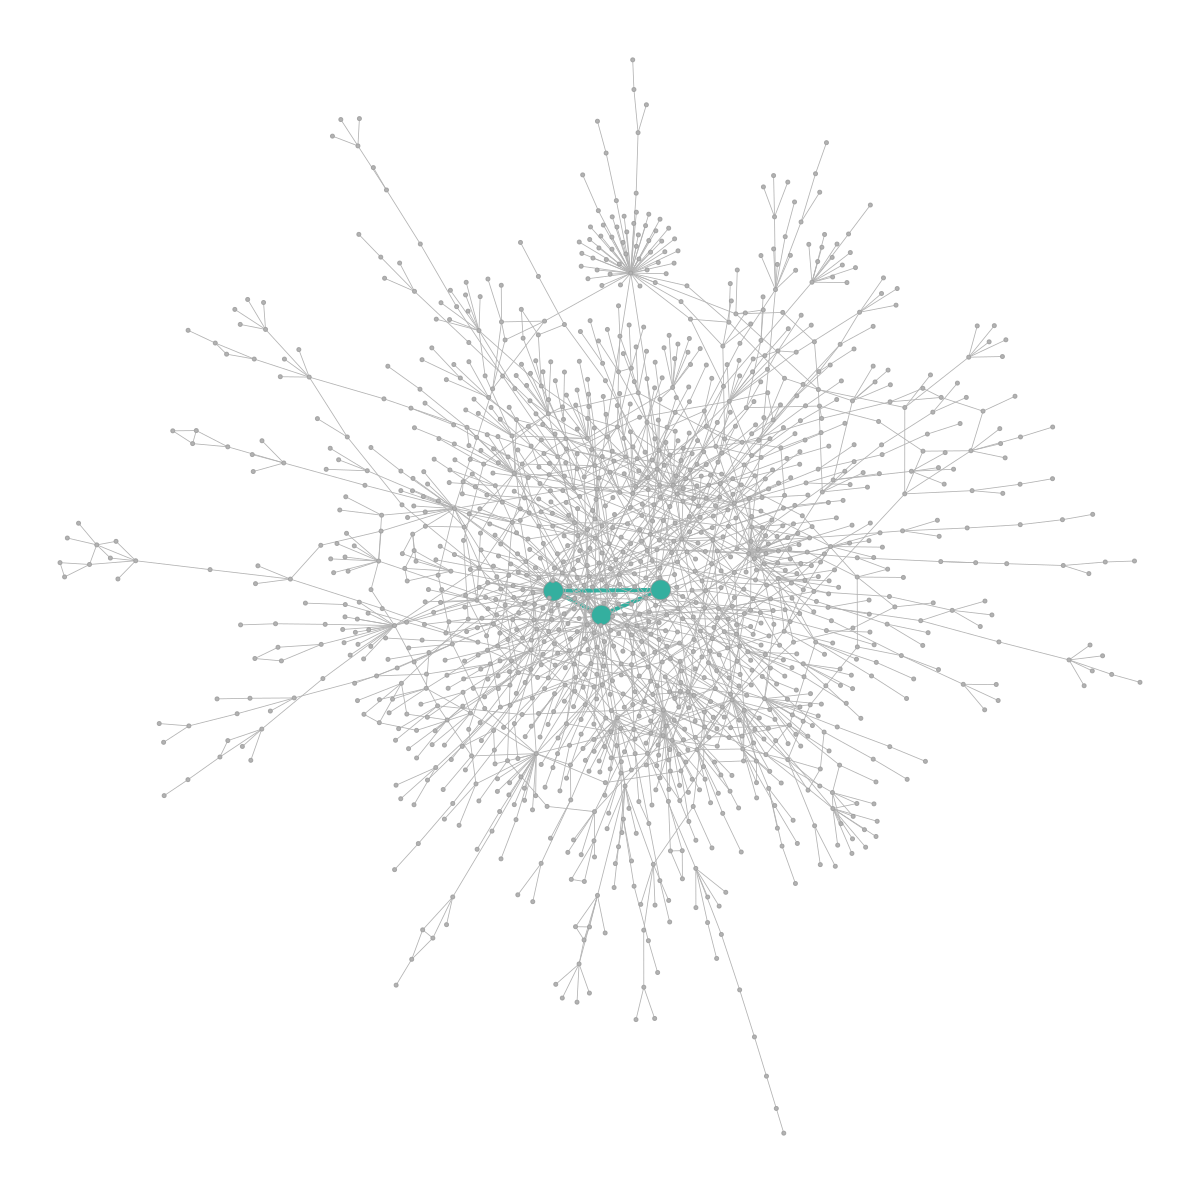

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7feefa590880, at 0x7feef4ba4a60>

In [65]:
gt.graph_draw(G, pos=pos, vertex_font_size=6, vertex_pen_width=.5, vertex_fill_color=vc, vertex_size=vs,
              edge_pen_width=es, edge_color=ec)#,
             #output='total_distance_closeness_central_clique.svg')